What is Spark? Distributed Computing Engine to handle lots of data

PySpark? is and API to use Spark with Python

# Install

1. First thing is to create an environment (for this example i created condaenv), there I installed pyspark
2. PySparks needs Java to be installed 

    brew install java
    
    sudo ln -sfn /opt/homebrew/opt/openjdk/libexec/openjdk.jdk /Library/Java/JavaVirtualMachines/openjdk.jdk) 

Why pyspark uses java gateway?https://medium.com/@dpk.bhtt/java-gateway-exited-java-gateway-process-exited-before-sending-its-port-number-eae90ccb990f

    

In [2]:
import pyspark

In [3]:
#Traditional way to read dataframes with pandas
import pandas as pd
type(pd.read_csv("Book1.csv"))

pandas.core.frame.DataFrame

# Build session and read a csv

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark=SparkSession.builder.appName('Practice').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/11 15:39:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
df_pyspark=spark.read.csv("Book1.csv")
df_pyspark

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string]

In [7]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [8]:
df_pyspark.show()

+--------+---+----------+------+
|     _c0|_c1|       _c2|   _c3|
+--------+---+----------+------+
|    Name|Age|Experience|Salary|
|ALEIDALI| 31|         9|  1000|
|    JUAN| 29|         3|   500|
|    JOSE| 10|         0|     0|
|  MONICA| 35|        15|  2000|
|   TOMAS| 20|         1|   300|
+--------+---+----------+------+



24/09/11 15:39:40 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


# Some pyspark dataframe fuctions

- Read options, set headers and column types
- Get columns names
- Show all the elements of a selected column
- dtypes and describe methods
- rename a column
- add a new column
- drop a column


In [5]:
# to set first row as headers
df_pyspark= spark.read.option('header','true').csv("Book1.csv")
df_pyspark.show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



In [6]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [8]:
df_pyspark.printSchema() # If we do not specify the columns type , all columns will be considered as strings

root
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)



In [9]:
# We can use InferSchema to modify column types
df_pyspark= spark.read.option('header','true').csv("Book1.csv",inferSchema=True)
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)



In [11]:
# easier way
df_pyspark=spark.read.csv("Book1.csv", header=True, inferSchema=True)
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)



In [7]:
#to see first record
df_pyspark.head(1)

[Row(Name='ALEIDALI', Age='31')]

In [13]:
# get columns names
df_pyspark.columns

['Name', 'Age']

In [15]:
# pick a column as see all its elements 
df_pyspark.select("Name")

DataFrame[Name: string]

In [17]:
df_pyspark.select("Name").show()

+--------+
|    Name|
+--------+
|ALEIDALI|
|    JUAN|
|    JOSE|
+--------+



In [20]:
df_pyspark.select(['Age','Name']).show()

+---+--------+
|Age|    Name|
+---+--------+
| 31|ALEIDALI|
| 29|    JUAN|
| 10|    JOSE|
+---+--------+



In [23]:
df_pyspark.dtypes

[('Name', 'string'), ('Age', 'int')]

In [25]:
df_pyspark.describe().show() # min and max is accordingly to the index in case they are strings

+-------+--------+------------------+
|summary|    Name|               Age|
+-------+--------+------------------+
|  count|       3|                 3|
|   mean|    NULL|23.333333333333332|
| stddev|    NULL|11.590225767142472|
|    min|ALEIDALI|                10|
|    max|    JUAN|                31|
+-------+--------+------------------+



In [29]:
# Adding columns, need to store in a variable to see the results
df_pyspark.withColumn('Age after 2 years', df_pyspark['Age']+2).show()

+--------+---+-----------------+
|    Name|Age|Age after 2 years|
+--------+---+-----------------+
|ALEIDALI| 31|               33|
|    JUAN| 29|               31|
|    JOSE| 10|               12|
+--------+---+-----------------+



In [28]:
df_pyspark.show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



In [30]:
df_pyspark=df_pyspark.withColumn('Age after 2 years', df_pyspark['Age']+2)
df_pyspark.show()

+--------+---+-----------------+
|    Name|Age|Age after 2 years|
+--------+---+-----------------+
|ALEIDALI| 31|               33|
|    JUAN| 29|               31|
|    JOSE| 10|               12|
+--------+---+-----------------+



In [31]:
#drop a column
df_pyspark.drop('Age after 2 years').show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



In [32]:
df_pyspark=df_pyspark.drop('Age after 2 years')
df_pyspark.show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



In [33]:
#Rename a column
df_pyspark.withColumnRenamed('Name','New Name').show()

+--------+---+
|New Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



# Handle Missing values

In [38]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practice').getOrCreate()
df_pyspark= spark.read.csv("Book1.csv",header=True,inferSchema=True)
df_pyspark.show()


+--------+----+
|    Name| Age|
+--------+----+
|ALEIDALI|  31|
|    JUAN|  29|
|    JOSE|  10|
|  MONICA|NULL|
+--------+----+



In [43]:
#drops raws with null values, any set as default
df_pyspark.na.drop(how="any").show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



In [46]:
# drop raws with all columns = null
df_pyspark.na.drop(how="all").show()

+--------+----+
|    Name| Age|
+--------+----+
|ALEIDALI|  31|
|    JUAN|  29|
|    JOSE|  10|
|  MONICA|NULL|
+--------+----+



In [50]:
#keep raws with at leat 2 not null values
df_pyspark.na.drop(how="any",thresh=2).show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



In [52]:
#drop null values in an specific colums
df_pyspark.na.drop(how="any",subset=['Name']).show()

+--------+----+
|    Name| Age|
+--------+----+
|ALEIDALI|  31|
|    JUAN|  29|
|    JOSE|  10|
|  MONICA|NULL|
+--------+----+



In [69]:
#Fill the missing values
df_pyspark.na.fill(1000,['Name','Age']).show()

+--------+----+
|    Name| Age|
+--------+----+
|ALEIDALI|  31|
|    JUAN|  29|
|    JOSE|  10|
|  MONICA|1000|
+--------+----+



In [72]:
# inputation with help of sklearn
from pyspark.ml.feature import Imputer

imp=Imputer(
    inputCols=['Age'],
    outputCols=["{}_imputed".format(c) for c in ['Age']],
    ).setStrategy("mean")

In [73]:
# apply to my dataframe
imp.fit(df_pyspark).transform(df_pyspark).show()

+--------+----+-----------+
|    Name| Age|Age_imputed|
+--------+----+-----------+
|ALEIDALI|  31|         31|
|    JUAN|  29|         29|
|    JOSE|  10|         10|
|  MONICA|NULL|         23|
+--------+----+-----------+



# Filter operations

In [74]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practice').getOrCreate()
df_pyspark= spark.read.csv("Book1.csv",header=True,inferSchema=True)
df_pyspark.show()

+--------+----+
|    Name| Age|
+--------+----+
|ALEIDALI|  31|
|    JUAN|  29|
|    JOSE|  10|
|  MONICA|NULL|
+--------+----+



In [75]:
df_pyspark.filter('Age<=25').show()

+----+---+
|Name|Age|
+----+---+
|JOSE| 10|
+----+---+



In [76]:
df_pyspark.filter('Age<=25').select(['Name']).show()

+----+
|Name|
+----+
|JOSE|
+----+



In [80]:
# many conditions
df_pyspark.filter((df_pyspark['Age']<=25) & 
                  (df_pyspark['Age']>10)).show()

+----+---+
|Name|Age|
+----+---+
+----+---+



In [81]:
# many conditions
df_pyspark.filter((df_pyspark['Age']<=25) | 
                  (df_pyspark['Age']>1)).show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
|    JOSE| 10|
+--------+---+



In [82]:
# inverse filer operation
# many conditions
df_pyspark.filter(~(df_pyspark['Age']<=25)).show()

+--------+---+
|    Name|Age|
+--------+---+
|ALEIDALI| 31|
|    JUAN| 29|
+--------+---+



# Group by and Aggregate fucntions

In [83]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practice').getOrCreate()
df_pyspark= spark.read.csv("Book1.csv",header=True,inferSchema=True)
df_pyspark.show()

+--------+----+
|    Name| Age|
+--------+----+
|ALEIDALI|  31|
|    JUAN|  29|
|    JOSE|  10|
|  MONICA|NULL|
+--------+----+



In [85]:
#group by
df_pyspark.groupBy('Name').sum().show()

+--------+--------+
|    Name|sum(Age)|
+--------+--------+
|    JOSE|      10|
|    JUAN|      29|
|  MONICA|    NULL|
|ALEIDALI|      31|
+--------+--------+



In [89]:
# group to get maximun age per name
df_pyspark.groupBy('Name').max('Age').show()

+--------+--------+
|    Name|max(Age)|
+--------+--------+
|    JOSE|      10|
|    JUAN|      29|
|  MONICA|    NULL|
|ALEIDALI|      31|
+--------+--------+



In [90]:
#count
df_pyspark.groupBy('Name').count().show()

+--------+-----+
|    Name|count|
+--------+-----+
|    JOSE|    1|
|    JUAN|    1|
|  MONICA|    1|
|ALEIDALI|    1|
+--------+-----+



In [92]:
# only aggregate
df_pyspark.agg({'Age':'min'}).show()

+--------+
|min(Age)|
+--------+
|      10|
+--------+



# PySpark Mlib

In [20]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practice').getOrCreate()
df_pyspark= spark.read.csv("Book1.csv",header=True,inferSchema=True)
df_pyspark.show()

+--------+----+----------+------+
|    Name| Age|Experience|Salary|
+--------+----+----------+------+
|ALEIDALI|31.0|       9.0|1000.0|
|    JUAN|29.0|       3.0| 500.0|
|    JOSE|10.0|       0.0|   0.0|
|  MONICA|35.0|      15.0|2000.0|
|   TOMAS|20.0|       1.0| 300.0|
+--------+----+----------+------+



Let´s suppose a basic problem to predict Salary based on Age and Experience

In [21]:
# We need to separate independet variables form dependent variables
from pyspark.ml.feature import VectorAssembler
features_assembler=VectorAssembler(inputCols=['Age','Experience'],outputCol='Independent_Features')
output=features_assembler.transform(df_pyspark)
output.show()

+--------+----+----------+------+--------------------+
|    Name| Age|Experience|Salary|Independent_Features|
+--------+----+----------+------+--------------------+
|ALEIDALI|31.0|       9.0|1000.0|          [31.0,9.0]|
|    JUAN|29.0|       3.0| 500.0|          [29.0,3.0]|
|    JOSE|10.0|       0.0|   0.0|          [10.0,0.0]|
|  MONICA|35.0|      15.0|2000.0|         [35.0,15.0]|
|   TOMAS|20.0|       1.0| 300.0|          [20.0,1.0]|
+--------+----+----------+------+--------------------+



In [22]:
finalized_data=output.select('Independent_Features','Salary')
finalized_data.show()

+--------------------+------+
|Independent_Features|Salary|
+--------------------+------+
|          [31.0,9.0]|1000.0|
|          [29.0,3.0]| 500.0|
|          [10.0,0.0]|   0.0|
|         [35.0,15.0]|2000.0|
|          [20.0,1.0]| 300.0|
+--------------------+------+



In [30]:
from pyspark.ml.regression import LinearRegression
#train test  split
train_data, test_data = finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independent_Features',labelCol='Salary')
results=regressor.fit(train_data)

24/09/11 13:16:29 WARN Instrumentation: [edb3ab56] regParam is zero, which might cause numerical instability and overfitting.


In [31]:
results.coefficients

DenseVector([8.3157, 117.1498])

In [32]:
results.intercept

-51.88091859488791

In [37]:
#predictions
pred_results=results.evaluate(test_data)
pred_results.predictions.show()

+--------------------+------+------------------+
|Independent_Features|Salary|        prediction|
+--------------------+------+------------------+
|          [31.0,9.0]|1000.0|1260.2545538791233|
+--------------------+------+------------------+



In [38]:
pred_results.meanAbsoluteError

260.25455387912325

In [39]:
pred_results.meanSquaredError

67732.43281482147

# Databricks

Plataforma en la nube construida sobre Apache Spark, it provides clusters to run in parallel, provides a collaboratuve environment for Big data processing and analytics.

Databricks is important because it makes it easier to use a Apache Spark. Instead of having to worry about all the technical stuff behind the scenes, Databricks gives you a simple and friendly way to use Spark.

Databricks also help to implement on MLFlow

Integrated to AWS, Azure or Google Cloud

Lo mismo que corrimos con PySpark se puede correr en DATABRICKS, pyspark ya viene precargada:
Steps:
1. Upload data base
2. Create a cluster
3. Use the same codesnippets to read de cvs or perform analyses

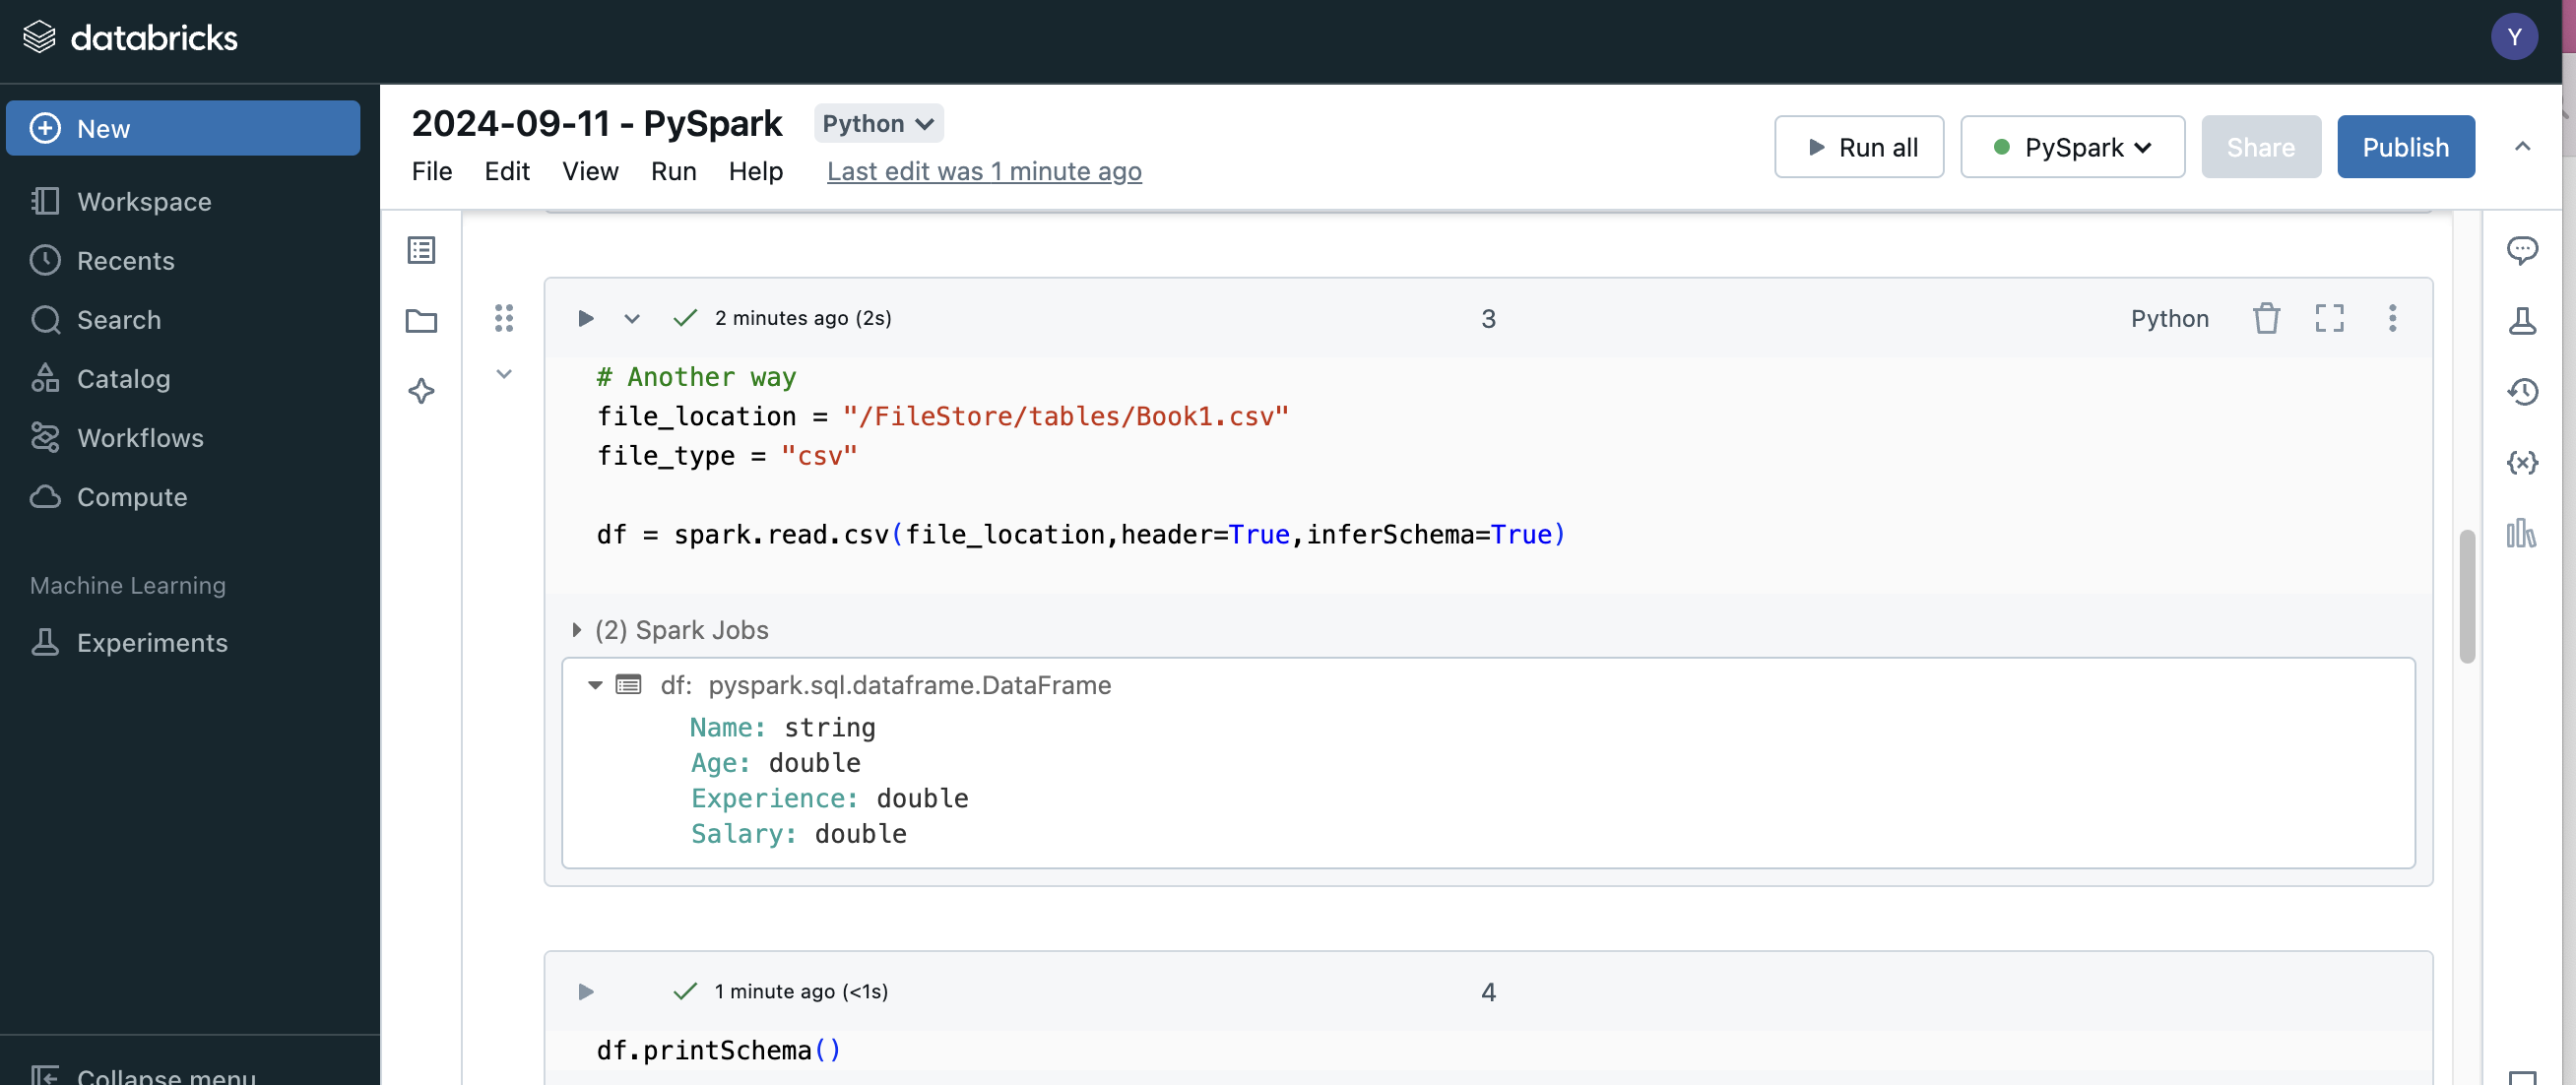